In this we will use IQR to detect the outliers in weights and heights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("height_weight.csv")
df.head()


,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


(array([   5.,   18.,   66.,  152.,  322.,  604.,  870., 1036., 1117.,
        1079., 1108., 1059.,  891.,  721.,  510.,  255.,  120.,   43.,
          19.,    5.]),
 array([54.26313333, 55.49991378, 56.73669423, 57.97347468, 59.21025513,
        60.44703558, 61.68381603, 62.92059648, 64.15737693, 65.39415738,
        66.63093784, 67.86771829, 69.10449874, 70.34127919, 71.57805964,
        72.81484009, 74.05162054, 75.28840099, 76.52518144, 77.7619619 ,
        78.99874235]),
 <BarContainer object of 20 artists>)

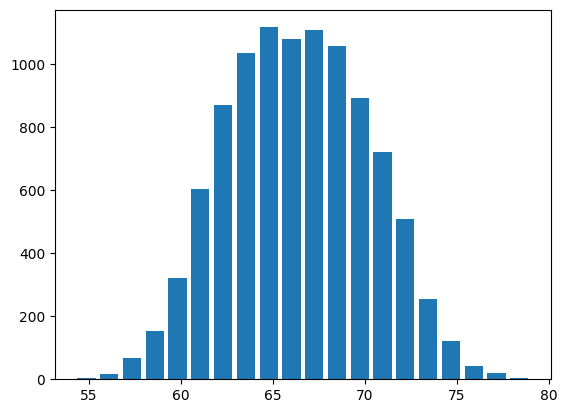

In [3]:
plt.hist(df.height, bins = 20, rwidth=0.8)

In [4]:
df.shape

(10000, 3)

In [5]:
df.describe()

,height,weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
Q3h = df.height.quantile(0.75)
Q1h = df.height.quantile(0.25)
Q3h, Q1h

(69.1742617268347, 63.505620481218955)

In [7]:
IQR = 69.1742617268347 - 63.505620481218955
IQR

5.668641245615746

In [8]:
upper_limit = Q3h + 1.5 * IQR
lower_limit = Q1h - 1.5 * IQR
upper_limit, lower_limit

(77.67722359525831, 55.00265861279534)

In [9]:
df[(df.height>upper_limit) | (df.height<lower_limit)]


,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [10]:
df2 = df[(df.height<upper_limit) & (df.height>lower_limit)]
df2

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [11]:
height_outlier = df.shape[0] - df2.shape[0]
height_outlier

8

For the weights

In [12]:
df

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


(array([4.000e+00, 1.100e+01, 6.200e+01, 2.160e+02, 4.640e+02, 7.770e+02,
        1.036e+03, 1.139e+03, 9.460e+02, 9.030e+02, 9.780e+02, 1.038e+03,
        9.790e+02, 7.680e+02, 4.200e+02, 1.780e+02, 5.100e+01, 2.000e+01,
        9.000e+00, 1.000e+00]),
 array([ 64.70012671,  74.9646053 ,  85.22908389,  95.49356248,
        105.75804107, 116.02251966, 126.28699825, 136.55147684,
        146.81595543, 157.08043402, 167.34491261, 177.6093912 ,
        187.87386979, 198.13834838, 208.40282697, 218.66730556,
        228.93178415, 239.19626274, 249.46074133, 259.72521992,
        269.98969851]),
 <BarContainer object of 20 artists>)

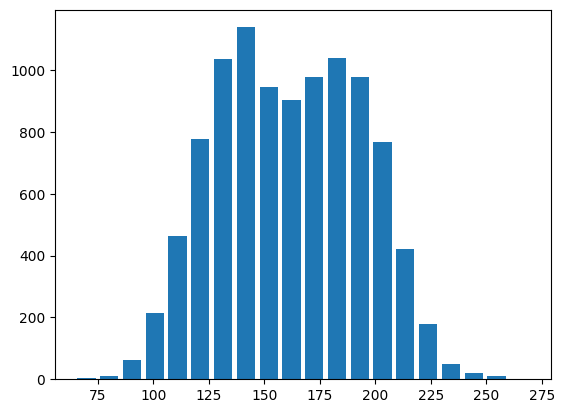

In [13]:
plt.hist(df.weight, bins= 20, rwidth=0.8)

In [14]:
df.describe()

,height,weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [15]:
Q3w = df.weight.quantile(0.75)
Q1w = df.weight.quantile(0.25)
Q3w, Q1w

(187.16952486868348, 135.8180513055015)

In [16]:
IQR =  Q3w - Q1w
IQR

51.35147356318197

In [17]:
upper_limit = Q3w + 1.5 * IQR
lower_limit = Q1w - 1.5 * IQR
upper_limit, lower_limit

(264.19673521345646, 58.79084096072856)

In [18]:
df[(df.weight>upper_limit) | (df.weight<lower_limit)]

,gender,height,weight
2014,Male,78.998742,269.989699


In [19]:
df3 = df[(df.weight<upper_limit) & (df.weight>lower_limit)]
df3

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [20]:
weight_outlier = df.shape[0] - df3.shape[0]
weight_outlier

1